In [1]:
# https://mail.google.com/mail/u/0/#inbox/QgrcJHrnscJGjsRzFLPzmGMZSlGWKMsntRB

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, DROSOPHILA_DIR
import urllib.request

In [4]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
mat_file = list(DROSOPHILA_DIR.glob('*.mat'))[0]
mat_file

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/DROSOPHILA_Data_Dir/transition_data.mat')

In [6]:
ds = scipy.io.loadmat(mat_file.as_posix())

In [7]:
ds.keys()

dict_keys(['__header__', '__version__', '__globals__', 'density', 'transition_states', 'xx', 'peakPoints', 'regionMap'])

In [8]:
ds['transition_states'][0]

array([array([[59],
       [43],
       [11],
       ...,
       [43],
       [40],
       [44]], dtype=uint8)], dtype=object)

In [9]:
states = [np.concatenate(np.concatenate(i)) for i in ds['transition_states']]

In [10]:
states[0]

array([59, 43, 11, ..., 43, 40, 44], dtype=uint8)

In [11]:
len(states[0])

10803

In [12]:
state_lens = [len(i) for i in states]

(array([ 3.,  1.,  6.,  8., 18., 11.,  8.,  3.,  0.,  1.]),
 array([ 7447. ,  8181.3,  8915.6,  9649.9, 10384.2, 11118.5, 11852.8,
        12587.1, 13321.4, 14055.7, 14790. ]),
 <a list of 10 Patch objects>)

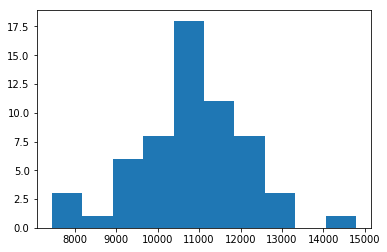

In [13]:
plt.hist(state_lens)

In [14]:
bouts_indv = [["{}_{}".format(bi, element) for element in bout] for bi, bout in enumerate(tqdm(states))]

In [15]:
print([len(np.unique(i)) for i in bouts_indv])

[116, 115, 115, 113, 113, 112, 114, 114, 114, 103, 106, 106, 103, 112, 93, 114, 106, 112, 114, 110, 111, 115, 110, 113, 113, 115, 112, 114, 108, 110, 107, 111, 109, 116, 113, 101, 113, 91, 96, 107, 115, 110, 113, 109, 111, 117, 110, 114, 117, 115, 115, 107, 113, 111, 113, 114, 112, 94, 112]


In [16]:
def remove_repeats(sequence):
    a = np.array(sequence[1:])
    b = np.array(sequence[:-1])
    c = [sequence[0]] + list(a[a != b])
    return c

In [17]:
bouts_indv_no_repeats = [remove_repeats(i) for i in bouts_indv]

In [18]:
len(bouts_indv[0]), len(bouts_indv_no_repeats[0])

(10803, 10799)

In [19]:
bouts_indv[0]

['0_59',
 '0_43',
 '0_11',
 '0_21',
 '0_11',
 '0_51',
 '0_52',
 '0_46',
 '0_52',
 '0_60',
 '0_59',
 '0_65',
 '0_46',
 '0_27',
 '0_32',
 '0_33',
 '0_40',
 '0_52',
 '0_43',
 '0_39',
 '0_43',
 '0_76',
 '0_106',
 '0_76',
 '0_52',
 '0_43',
 '0_9',
 '0_4',
 '0_9',
 '0_21',
 '0_9',
 '0_21',
 '0_11',
 '0_21',
 '0_69',
 '0_59',
 '0_46',
 '0_42',
 '0_52',
 '0_43',
 '0_9',
 '0_21',
 '0_4',
 '0_9',
 '0_10',
 '0_52',
 '0_46',
 '0_80',
 '0_69',
 '0_80',
 '0_84',
 '0_103',
 '0_60',
 '0_43',
 '0_9',
 '0_21',
 '0_4',
 '0_21',
 '0_52',
 '0_69',
 '0_66',
 '0_46',
 '0_52',
 '0_43',
 '0_21',
 '0_43',
 '0_52',
 '0_53',
 '0_60',
 '0_59',
 '0_68',
 '0_46',
 '0_52',
 '0_40',
 '0_52',
 '0_39',
 '0_43',
 '0_21',
 '0_10',
 '0_21',
 '0_43',
 '0_52',
 '0_43',
 '0_52',
 '0_76',
 '0_52',
 '0_31',
 '0_9',
 '0_10',
 '0_9',
 '0_10',
 '0_9',
 '0_4',
 '0_43',
 '0_52',
 '0_48',
 '0_59',
 '0_32',
 '0_65',
 '0_38',
 '0_45',
 '0_52',
 '0_45',
 '0_33',
 '0_46',
 '0_33',
 '0_40',
 '0_52',
 '0_39',
 '0_4',
 '0_43',
 '0_52',
 '0_

### Mutual information

In [20]:
from childes_mi.information_theory import mutual_information as mi

In [21]:
distances = np.arange(1,1001)

In [22]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    bouts_indv_no_repeats, distances=distances, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed: 11.2min


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 13.3min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed: 12.7min


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.5min finished


In [23]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [24]:
MI_DF.to_pickle(DATA_DIR / "mi" / "drosophila_mi_1000_no_repeats.pickle")

In [25]:
MI_DF[:10]

,MI,MI_var,shuff_MI,shuff_MI_var,distances
0,"[11.490855469682131, 11.113366318302845, 10.94...","[0.0032101072658640537, 0.003149172574458995, ...","[10.161828640522714, 10.162527974052363, 10.16...","[0.003050721552143333, 0.0030510759230475046, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [29]:
row = MI_DF.iloc[0]

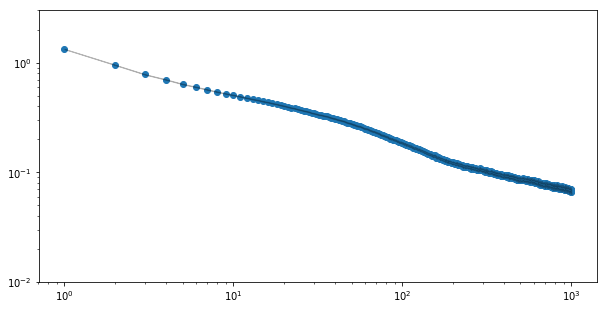

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
ax.set_ylim([1e-2, 3])
ax.set_yscale('log')
ax.set_xscale('log')

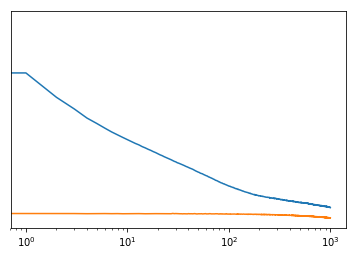

In [31]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)